In [1]:
import epics
import numpy as _np

from mathphys.imgproc import Image2D_Fit as _Image2D_Fit
from mathphys.imgproc import FitGaussianScipy as _FitGaussianScipy
from siriuspy.devices import Device as _Device, DVF as _DVF
from siriuspy.devices import DVFImgProc

In [2]:
dvfimgproc = DVFImgProc(devname=DVFImgProc.DEVICES.CAX_DVF2)

In [3]:
dvfimgproc.connected

True

# Test ROI and fitting

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:ylabel='Projection Intensity'>)

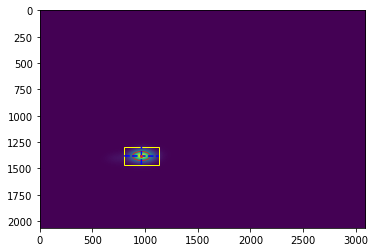

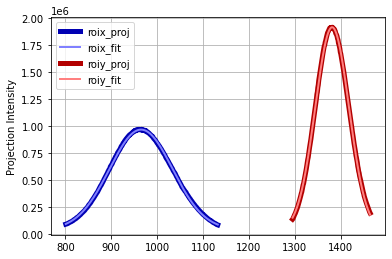

In [4]:
# This will plot current image and fitting

img = dvfimgproc.create_image2dfit()
img.imshow()
img.plot_projections()
# print(img)

In [5]:
# print current roix and roiy

print('roix: ', dvfimgproc.roix)
print('roiy: ', dvfimgproc.roiy)

roix:  [ 795 1127]
roiy:  [1296 1468]


In [6]:
# calculate new roix and oiy

factor = 5

cx, cy = dvfimgproc.roix_fit_mean, dvfimgproc.roiy_fit_mean
sx, sy = dvfimgproc.roix_fwhm, dvfimgproc.roiy_fwhm

print('mean: ', cx, cy)
print('fwhm: ', sx, sy)

roix = int(cx - factor * sx/2), int(cx + factor * sx/2)
roiy = int(cy - factor * sy/2), int(cy + factor * sy/2)

print('roix: ', roix)
print('roiy: ', roiy)

mean:  966.1243091920435 1381.4284105765623
fwhm:  165 83
roix:  (553, 1378)
roiy:  (1173, 1588)


In [7]:
# set new roix and roiy

dvfimgproc.roix = roix
dvfimgproc.roiy = roiy

In [8]:
print('roix_fit_error [%]: ', dvfimgproc.roix_fit_error)
print('roiy_fit_error [%]: ', dvfimgproc.roiy_fit_error)

roix_fit_error [%]:  3.253830033751365
roiy_fit_error [%]:  1.4299033645410746


In [11]:
dvfimgproc.log

'[487138] DVF Image update timeout!'

# ROIUpdateFWHM

In [12]:
print('roix_fwhm_factor: ', dvfimgproc.roix_fwhm_factor)
print('roiy_fwhm_factor: ', dvfimgproc.roiy_fwhm_factor)

roix_fwhm_factor:  2.0
roiy_fwhm_factor:  2.0


In [14]:
dvfimgproc.roix_fwhm_factor = 2
dvfimgproc.roiy_fwhm_factor = 2

In [19]:
dvfimgproc.roi_update_with_fwhm

1

In [35]:
dvfimgproc.roi_with_fwhm = True

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:ylabel='Projection Intensity'>)

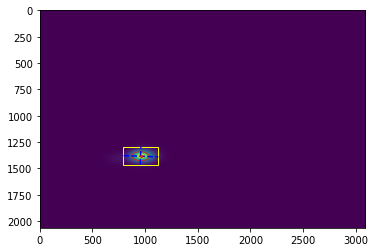

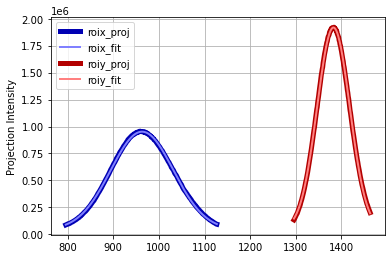

In [20]:
img = dvfimgproc.create_image2dfit()
img.imshow()
img.plot_projections()